In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from utils import *


In [2]:
covertype = fetch_covtype() # https://archive.ics.uci.edu/dataset/31/covertype
X = covertype.data
y = covertype.target
print(X.shape,y.shape)

(581012, 54) (581012,)


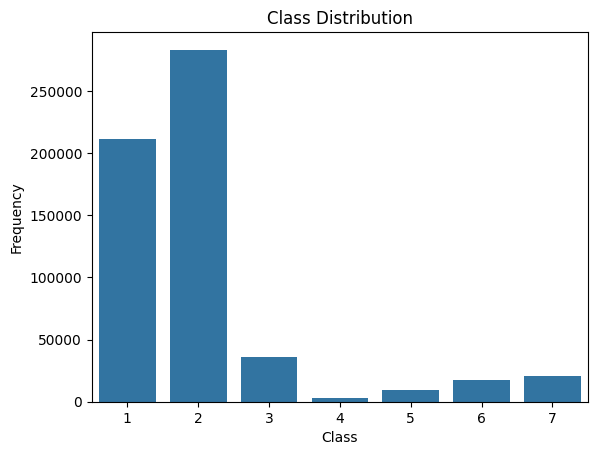

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()
num_of_classes = np.unique(y).size

In [4]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Initialize the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the testing data using AdaBoost
y_pred_adaboost = adaboost_clf.predict(X_test)

# Calculate various metrics for AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

# Print the metrics for AdaBoost
print("AdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_adaboost)
print("Precision:", precision_adaboost)
print("Recall:", recall_adaboost)
print("Weighted F1 Score:", f1_adaboost)

gradientboost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting classifier on the training data
gradientboost_clf.fit(X_train, y_train)

# Make predictions on the testing data using Gradient Boosting
y_pred_gradientboost = gradientboost_clf.predict(X_test)

# Calculate various metrics for Gradient Boosting
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
precision_gradientboost = precision_score(y_test, y_pred_gradientboost, average='weighted')
recall_gradientboost = recall_score(y_test, y_pred_gradientboost, average='weighted')
f1_gradientboost = f1_score(y_test, y_pred_gradientboost, average='weighted')

# Print the metrics for Gradient Boosting
print("\nGradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gradientboost)
print("Precision:", precision_gradientboost)
print("Recall:", recall_gradientboost)
print("F1 Score:", f1_gradientboost)

# Classification report for Gradient Boosting
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gradientboost))



d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Classifier Metrics:
Accuracy: 0.4953242610611346
Precision: 0.6099244478930624
Recall: 0.4953242610611346
Weighted F1 Score: 0.5239976538323496

Gradient Boosting Classifier Metrics:
Accuracy: 0.7706363594639251
Precision: 0.7698504844584944
Recall: 0.7706363594639251
F1 Score: 0.7668495633578172

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           1       0.76      0.75      0.75     63556
           2       0.78      0.82      0.80     85078
           3       0.77      0.83      0.80     10638
           4       0.79      0.74      0.77       795
           5       0.75      0.23      0.36      2941
           6       0.66      0.48      0.55      5227
           7       0.87      0.70      0.77      6069

    accuracy                           0.77    174304
   macro avg       0.77      0.65      0.69    174304
weighted avg       0.77      0.77      0.77    174304



In [6]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           1       0.59      0.65      0.62     63556
           2       0.75      0.43      0.55     85078
           3       0.27      0.36      0.31     10638
           4       0.00      0.00      0.00       795
           5       0.29      0.02      0.04      2941
           6       0.10      0.47      0.16      5227
           7       0.12      0.34      0.18      6069

    accuracy                           0.50    174304
   macro avg       0.30      0.32      0.27    174304
weighted avg       0.61      0.50      0.52    174304



d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for AdaBoost
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("\nConfusion Matrix for AdaBoost:")
print(conf_matrix_adaboost)

# Compute confusion matrix for Gradient Boosting
conf_matrix_gradientboost = confusion_matrix(y_test, y_pred_gradientboost)
print("\nConfusion Matrix for Gradient Boosting:")
print(conf_matrix_gradientboost)



Confusion Matrix for AdaBoost:
[[41076 10729   930     0    10   843  9968]
 [23650 36838  6561     0   161 13278  4590]
 [   51   281  3865     0     1  6440     0]
 [    0     0    77     0     0   718     0]
 [  552  1245   217     0    71   856     0]
 [   25   116  2644     0     0  2442     0]
 [ 4012    12     0     0     0     0  2045]]

Confusion Matrix for Gradient Boosting:
[[47454 15421    24     0    29    24   604]
 [13468 70057   779     1   184   536    53]
 [    0  1002  8801   112     9   714     0]
 [    0     0   183   588     0    24     0]
 [   33  2128    83     0   691     6     0]
 [    0  1068  1610    40     4  2505     0]
 [ 1799    41     0     0     0     0  4229]]


In [8]:
y_scores = adaboost_clf.predict_proba(X_test)
print(f"Macro-Averaged AUPRC: {macro_averaged_auprc(y_true=y_test,y_scores=y_scores,n_classes=num_of_classes)}")
print(f"F measure for beta=10: {f_measure(y_test,y_pred_adaboost,beta=10)}")
print(f"Modified mcc: {mmcc(y_true=y_test,y_pred=y_pred_adaboost,classes=range(num_of_classes))}")
print(f"MCC metirc: {matthews_corrcoef(y_test,y_pred_adaboost)}")
print(f"GMEAN: {np.prod(g_mean_multiclass(y_true=y_test,y_pred=y_pred_adaboost,n_classes=num_of_classes)[1][1::])}")

d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Macro-Averaged AUPRC: 0.31232334137480994
F measure for beta=10: 0.5039319888896057


d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modified mcc: 0.26488083587741335
MCC metirc: 0.2971416080254186


d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GMEAN: 0.0


In [9]:
y_scores = adaboost_clf.predict_proba(X_test)
print(f"Macro-Averaged AUPRC: {macro_averaged_auprc(y_true=y_test,y_scores=y_scores,n_classes=num_of_classes)}")
print(f"F measure for beta=10: {f_measure(y_test,y_pred_adaboost,beta=10)}")
print(f"Modified mcc: {mmcc(y_true=y_test,y_pred=y_pred_adaboost,classes=range(num_of_classes))}")
print(f"MCC metirc: {matthews_corrcoef(y_test,y_pred_adaboost)}")
print(f"GMEAN: {np.prod(g_mean_multiclass(y_true=y_test,y_pred=y_pred_adaboost,n_classes=num_of_classes)[1][1::])}")

d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Macro-Averaged AUPRC: 0.31232334137480994
F measure for beta=10: 0.5039319888896057


d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modified mcc: 0.26488083587741335
MCC metirc: 0.2971416080254186


d:\MachineLearningSkoltech\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GMEAN: 0.0
